# Image Steganography

Steganography is the practice of concealing a file, message, image, or video within another file, message, image, or video. The word steganography comes from Greek steganographia, which combines the words steganós, meaning "covered or concealed", and -graphia meaning "writing".

Steganography can be used to conceal almost any type of digital content, including text, image, video or audio content. The data to be hidden can be hidden inside any type of digital file. The content to be concealed through steganography, called hidden text is often encrypted before being incorporated into the innocuous-seeming cover text file or data stream. If not encrypted, the hidden text is commonly processed in some way in order to increase the difficulty of detecting the secret content.

Steganography comprises of three components:
1. Carrier (Image, Video, MP3 file, etc)
2. Message (Hidden text to be transfered)
3. Key (Password, pattern, etc)

Here an algorithm has been devised to encode a message in an image. Later using the same pattern as the key, it has been decoded.

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

### Converting every charcater to its 8 digit binary equivalent

Eg. Data = 'a', 
value 01100001 returned.

In [2]:
def create(data):
        binary = []

        for i in data:
            binary.append(format(ord(i), '08b'))
        return(binary)


### Modifying the pixel value according to odd and even

We extract 3 pixels at a time, each having 3 values - RGB. 3 x 3 = 9 values we have in total. We compare the values with the binary equivalent we have. 
###### Eg. Binary = 01100001
###### Pixels = [(27, 64, 164), (248, 244, 194), (174, 246, 250)]
The first 8 values of pixels are used to encode the binary number, the 9th value is used to symbolize if the message is over or still left. 0 for end of string and 1 to continue. 
If we encounter 0 in Binary, the corresponding pixel value must be even. If it is odd - we add or subtract 1 from it.
If we encounter 1 in Binary, the corresponding pixel value must be odd. If it is even - we add or subtract 1 from it.

###### New Pixels = [(26, 63, 163), (248, 244, 194), (174, 245, 250)]
This value is returned.


In [3]:
def odd_even(pixel, data):

    binary = create(data)
    data_length = len(binary)
    data_iteration = iter(pixel)

    for i in range(data_length):

        # Extracting 3 pixels at a time
        pixel = [value for value in data_iteration.__next__()[:3] + data_iteration.__next__()[:3] 
                 + data_iteration.__next__()[:3]]

        # Pixel value should be made
        # odd for 1 and even for 0
        for j in range(0, 8):
            if (binary[i][j] == '0' and pixel[j]% 2 != 0):
                pixel[j] -= 1

            elif (binary[i][j] == '1' and pixel[j] % 2 == 0):
                if(pixel[j] != 0):
                    pixel[j] -= 1
                else:
                    pixel[j] += 1
                # pix[j] -= 1

        # Eighth pixel of every set tells
        # whether to stop ot read further.
        # 0 means keep reading; 1 means thec
        # message is over.
        if (i == data_length - 1):
            if (pixel[-1] % 2 == 0):
                if(pixel[-1] != 0):
                    pixel[-1] -= 1
                else:
                    pixel[-1] += 1

        else:
            if (pixel[-1] % 2 != 0):
                pixel[-1] -= 1

        pixel = tuple(pixel)
        yield pixel[0:3]
        yield pixel[3:6]
        yield pixel[6:9]

### Modifying the pixel values in the Image

In [4]:
def modify(img, data):
    img_size = img.size[0] #Width
    (x, y) = (0, 0)
    for pixel in odd_even(img.getdata(), data):
        img.putpixel((x, y), pixel)
        if (x == img_size - 1):
            x = 0
            y += 1
        else:
            x += 1

### Encoding the Image with Desired Message

In [5]:
def encode():
    img = input("Enter the image to be opened: ")
    image = Image.open(img, 'r')
    print("The original Image is: ")
    plt.imshow(image)
    data = input("Enter data to be encoded : ")
    if (len(data) == 0):
        raise ValueError('Data Insuficient')
    new_img = image.copy()
    modify(new_img, data)
    modified = input("Enter the name of new image : ")
    new_img.save(modified, str(modified.split(".")[1].upper()))

### Decoding The Message from the Image

In [6]:
def decode():
    img = input("Enter image name: ")
    image = Image.open(img, 'r')
    data = ""
    img_data = iter(image.getdata())
    print("The modified image is: \n")
    plt.imshow(image)
    while (True):
        pixels = [value for value in img_data.__next__()[:3] + img_data.__next__()[:3] + img_data.__next__()[:3]]
        # string of binary data
        binary_str = ""

        for i in pixels[:8]:
            if (i % 2 == 0):
                binary_str += '0'
            else:
                binary_str += '1'
        data += chr(int(binary_str, 2))
        if (pixels[-1] % 2 != 0):
            return data

In [7]:
def steganography():
    print("................IMAGE STEGANOGRAPHY.................")
    choice = int(input("What would you like to do?\n"
                        "1. Encode\n2. Decode\n Enter your choice: "))
    if (choice == 1):
        encode()

    elif (choice == 2):
        print("Decoded Word from the image :  " + decode())
    else:
        raise Exception("Invalid Input")

................IMAGE STEGANOGRAPHY.................
What would you like to do?
1. Encode
2. Decode
 Enter your choice: 1
Enter the image to be opened: Team.png
The original Image is: 
Enter data to be encoded : This is us
Enter the name of new image : Team2.png


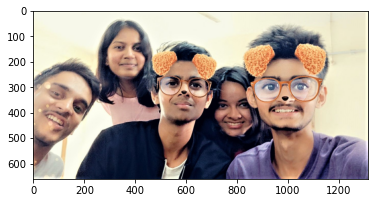

In [8]:
steganography()

................IMAGE STEGANOGRAPHY.................
What would you like to do?
1. Encode
2. Decode
 Enter your choice: 2
Enter image name: Team2.png
The modified image is: 

Decoded Word from the image :  This is us


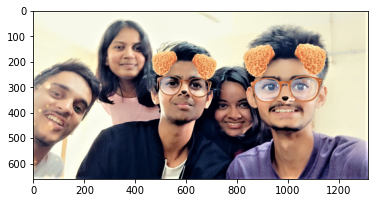

In [9]:
steganography()